In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import time

#import data
df = pd.read_csv('ccdefault.csv')
X = df.iloc[:, 1:-1]
y = df.iloc[: ,-1]

del df['ID']
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 30000 x 24
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0

In [56]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object
Total number of numeric columns: 24
Total number of categorical columns: 0


In [57]:
#printing out some statistical information of the data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

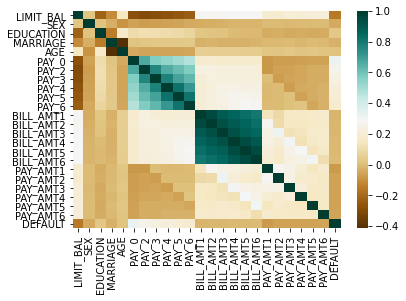

In [58]:
columnsNamesArr = df.columns.values
print(df)
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,cmap='BrBG',cbar=True,xticklabels=columnsNamesArr,yticklabels=columnsNamesArr)

In [40]:
tree = DecisionTreeClassifier()
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.arange(1,11),
              "criterion": ["gini", "entropy"]}

In [41]:
#determining the optimal max_depth and criterion for our Decision Tree Classifier model
tree_cv = GridSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X,y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4}
Best score is 0.8207999999999999


In [61]:
steps = [('scaler',StandardScaler()),('tree', DecisionTreeClassifier(criterion = 'gini',max_depth = 4))]
pipeline = Pipeline(steps)

In [91]:
#running in sample data using pipeline Decision Tree Classifier
t1 = time.time()
In = []
Out = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .1,random_state = i,stratify=y)
    pipeline.fit(X_train,y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    In.append(accuracy_score(y_train,y_pred_train))
    Out.append(accuracy_score(y_test,y_pred_test))
t2 = time.time()
print("In sample Scores: " + str(In))
print("Mean of Scores for In sample: " + str(np.mean(In)) + " , Std. Dev: " + str(np.std(In)))
print("Out sample: " + str(Out))
print("Mean of Scores for Out sample: " + str(np.mean(Out)) + " , Std. Dev: " + str(np.std(Out)))
print("Running time for Random Train Test Splits: " + str(t2-t1))

In sample Scores: [0.8225555555555556, 0.8225925925925925, 0.8241111111111111, 0.8238518518518518, 0.8231481481481482, 0.8238888888888889, 0.8232592592592592, 0.8237777777777778, 0.8238518518518518, 0.8237777777777778]
Mean of Scores for In sample: 0.8234814814814815 , Std. Dev: 0.0005310651356721515
Out sample: [0.8283333333333334, 0.824, 0.8173333333333334, 0.8203333333333334, 0.818, 0.819, 0.8253333333333334, 0.8166666666666667, 0.8173333333333334, 0.8206666666666667]
Mean of Scores for Out sample: 0.8206999999999999 , Std. Dev: 0.0037400237670070827
Running time for Random Train Test Splits: 2.349748134613037


In [92]:
t1 = time.time()
#running in sample data using cross_val_score
result1 = cross_val_score(pipeline, X_train, y_train, cv=10)
#running out sample data using cross_val_score
result2 = cross_val_score(pipeline, X_test, y_test, cv=10)
t2 = time.time()
print("In sample Scores: " + str(result1))
print("Mean of Scores for In sample: " + str(np.mean(result1)) + " , Std. Dev: " + str(np.std(result1)))
print("Out sample: " + str(result2))
print("Mean of Scores for Out sample: " + str(np.mean(result2)) + " , Std. Dev: " + str(np.std(result2)))
print("Running time for Cross Validation: " + str(t2-t1))

In sample Scores: [0.81555556 0.8237037  0.81444444 0.81592593 0.82592593 0.82
 0.82518519 0.82       0.81777778 0.8262963 ]
Mean of Scores for In sample: 0.8204814814814816 , Std. Dev: 0.0043034742081986465
Out sample: [0.83333333 0.80666667 0.82333333 0.81       0.82       0.81333333
 0.79       0.81333333 0.81333333 0.81      ]
Mean of Scores for Out sample: 0.8133333333333332 , Std. Dev: 0.010749676997731397
Running time for Cross Validation: 1.9535057544708252


In [87]:
print("My name is Yohanes Susanto")
print("My NetID is: yohanes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yohanes Susanto
My NetID is: yohanes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
